<a href="https://colab.research.google.com/github/elienhanj/classification_bankmarketing/blob/main/bank_classification_elien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Model Klasifikasi Perbandingan Algoritma Random Forest Classifier dan Naive Bayes Classifier dengan Menggunakan Data Bank**

Elien Hanjani Pramitha - Telkom DTI 2020 - DS0108

Model klasifikasi ini akan membandingkan performa dari dua algoritma yaitu random forest classifier dan naive bayes classifier. Data yang digunakan adalah bank marketing dataset dari https://www.kaggle.com/janiobachmann/bank-marketing-dataset .

## **Deskripsi Atribut**

- age: (numeric)

- job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

- marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

- education: (categorical: primary, secondary, tertiary and unknown)

- default: has credit in default? (categorical: 'no','yes','unknown')

- housing: has housing loan? (categorical: 'no','yes','unknown')

- loan: has personal loan? (categorical: 'no','yes','unknown')

- balance: Balance of the individual.

- contact: contact communication type (categorical: 'cellular','telephone')

- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

- day: last contact day of the month (numeric: 1,2,3,....29,30)

- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

- previous: number of contacts performed before this campaign and for this client (numeric)

- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

- deposit - has the client subscribed a term deposit? (binary: 'yes','no')

## **Preparing Data**

**import semua library yang dibutuhkan untuk membangun model :**

In [48]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import export_graphviz
import os
from IPython.display import Image
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**mengimport dataset bank dari github menggunakan library pandas, membuat dataframe dengan memisahkan kolom menggunakan separator "," , dan menampilkan 5 data pertama :**

In [49]:
df_bank = pd.read_csv('https://raw.githubusercontent.com/elienhanj/classification_bankmarketing/main/bank.csv', sep = ',')
df_bank

df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


**menampilkan informasi dari dataset bank, dimana ada 7 kolom memiliki tipe data integer dan 10 kolom memiliki tipe data object :**

In [50]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


**menampilkan descriptive statistics :**

In [51]:
df_bank.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


## **Preprocessing Data**

**cek apakah ada data yang kosong? untuk dataset bank ini dapat dilihat bahwa semua data sudah terisi, tidak ada yang kosong :**

In [52]:
# Check for Missing Values
df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [53]:
cols = df_bank.columns
num_cols= df_bank._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
df_bank[cat_cols]

,housing,loan,deposit,poutcome,job,contact,month,education,default,marital
0,yes,no,yes,unknown,admin.,unknown,may,secondary,no,married
1,no,no,yes,unknown,admin.,unknown,may,secondary,no,married
2,yes,no,yes,unknown,technician,unknown,may,secondary,no,married
3,yes,no,yes,unknown,services,unknown,may,secondary,no,married
4,no,no,yes,unknown,admin.,unknown,may,tertiary,no,married
...,...,...,...,...,...,...,...,...,...,...
11157,yes,no,no,unknown,blue-collar,cellular,apr,primary,no,single
11158,no,no,no,unknown,services,unknown,jun,secondary,no,married
11159,no,no,no,unknown,technician,cellular,aug,secondary,no,single
11160,no,yes,no,failure,technician,cellular,may,secondary,no,married


In [54]:
data1 = df_bank[cat_cols].apply(LabelEncoder().fit_transform)
data1

,housing,loan,deposit,poutcome,job,contact,month,education,default,marital
0,1,0,1,3,0,2,8,1,0,1
1,0,0,1,3,0,2,8,1,0,1
2,1,0,1,3,9,2,8,1,0,1
3,1,0,1,3,7,2,8,1,0,1
4,0,0,1,3,0,2,8,2,0,1
...,...,...,...,...,...,...,...,...,...,...
11157,1,0,0,3,1,0,0,0,0,2
11158,0,0,0,3,7,2,6,1,0,1
11159,0,0,0,3,9,0,1,1,0,2
11160,0,1,0,0,9,0,8,1,0,1


In [55]:
dataf = data1.join(df_bank[num_cols])
dataf

,housing,loan,deposit,poutcome,job,contact,month,education,default,marital,age,balance,day,duration,campaign,pdays,previous
0,1,0,1,3,0,2,8,1,0,1,59,2343,5,1042,1,-1,0
1,0,0,1,3,0,2,8,1,0,1,56,45,5,1467,1,-1,0
2,1,0,1,3,9,2,8,1,0,1,41,1270,5,1389,1,-1,0
3,1,0,1,3,7,2,8,1,0,1,55,2476,5,579,1,-1,0
4,0,0,1,3,0,2,8,2,0,1,54,184,5,673,2,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,1,0,0,3,1,0,0,0,0,2,33,1,20,257,1,-1,0
11158,0,0,0,3,7,2,6,1,0,1,39,733,16,83,4,-1,0
11159,0,0,0,3,9,0,1,1,0,2,32,29,19,156,2,-1,0
11160,0,1,0,0,9,0,8,1,0,1,43,0,8,9,2,172,5


In [56]:
dataf[dataf.pdays == -1]

,housing,loan,deposit,poutcome,job,contact,month,education,default,marital,age,balance,day,duration,campaign,pdays,previous
0,1,0,1,3,0,2,8,1,0,1,59,2343,5,1042,1,-1,0
1,0,0,1,3,0,2,8,1,0,1,56,45,5,1467,1,-1,0
2,1,0,1,3,9,2,8,1,0,1,41,1270,5,1389,1,-1,0
3,1,0,1,3,7,2,8,1,0,1,55,2476,5,579,1,-1,0
4,0,0,1,3,0,2,8,2,0,1,54,184,5,673,2,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11156,1,0,0,3,1,0,5,1,0,2,34,-72,7,273,5,-1,0
11157,1,0,0,3,1,0,0,0,0,2,33,1,20,257,1,-1,0
11158,0,0,0,3,7,2,6,1,0,1,39,733,16,83,4,-1,0
11159,0,0,0,3,9,0,1,1,0,2,32,29,19,156,2,-1,0


In [57]:
dataf.pdays.value_counts()

-1      8324
 92      106
 182      89
 91       84
 181      81
        ... 
 587       1
 579       1
 515       1
 491       1
 683       1
Name: pdays, Length: 472, dtype: int64

In [58]:
dataf.corr()

,housing,loan,deposit,poutcome,job,contact,month,education,default,marital,age,balance,day,duration,campaign,pdays,previous
housing,1.000000,0.076761,-0.203888,-0.046370,-0.136965,0.226392,0.219602,-0.109168,0.011076,-0.036345,-0.168700,-0.077092,-0.014770,0.035051,0.006660,0.064497,-0.000840
loan,0.076761,1.000000,-0.110580,0.026344,-0.067092,0.006829,0.025329,-0.073154,0.076434,-0.062029,-0.031418,-0.084589,0.017269,-0.001914,0.034722,-0.030416,-0.022668
deposit,-0.203888,-0.110580,1.000000,-0.122369,0.063395,-0.249847,-0.037121,0.095948,-0.040680,0.067610,0.034901,0.081129,-0.056326,0.451919,-0.128081,0.151593,0.139867
poutcome,-0.046370,0.026344,-0.122369,1.000000,-0.004238,0.257993,-0.042456,-0.040262,0.042357,-0.039424,-0.002699,-0.027151,0.080221,0.042171,0.112127,-0.806533,-0.549333
job,-0.136965,-0.067092,0.063395,-0.004238,1.000000,-0.087915,-0.076011,0.147046,-0.007066,0.078314,-0.031603,0.028736,0.026589,0.002432,0.003104,-0.003385,0.012665
contact,0.226392,0.006829,-0.249847,0.257993,-0.087915,1.000000,0.289803,-0.132540,0.035709,-0.060456,0.027762,-0.027295,0.007943,-0.018000,0.059258,-0.227785,-0.169919
month,0.219602,0.025329,-0.037121,-0.042456,-0.076011,0.289803,1.000000,-0.055868,0.000950,-0.004070,-0.026130,0.007264,-0.019840,-0.006482,-0.098123,0.033631,0.029283
education,-0.109168,-0.073154,0.095948,-0.040262,0.147046,-0.132540,-0.055868,1.000000,-0.010709,0.125845,-0.126018,0.051728,0.016759,-0.019122,-0.005327,0.025165,0.022427
default,0.011076,0.076434,-0.040680,0.042357,-0.007066,0.035709,0.000950,-0.010709,1.000000,-0.014691,-0.011425,-0.060954,0.017342,-0.009760,0.030975,-0.036282,-0.035273
marital,-0.036345,-0.062029,0.067610,-0.039424,0.078314,-0.060456,-0.004070,0.125845,-0.014691,1.000000,-0.442782,-0.002138,-0.003642,0.006781,-0.030794,0.031200,0.031281


**membagi data test 80% dan data train 20%**

In [59]:
X = dataf.drop('deposit',axis=1)
y = dataf['deposit']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=101)

## **Random Forest Classifier**

**inisialisasi parameter algoritma Random Forest Classifier**

In [60]:
rfc = RandomForestClassifier(n_estimators=50,max_depth=5, random_state=101,max_leaf_nodes=50)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=50, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [61]:
y_pred1 = rfc.predict(X_test)

In [62]:
estimator = rfc.estimators_[5]
# Export as dot file
export_graphviz(estimator, 
                out_file='tree1.dot', 
                feature_names = X_train.columns,
                class_names = 'deposit',
                rounded = True, proportion = False, 
                precision = 2, filled = True)

**menampilkan forest / kumpulan dari tree yang sudah dibuat**

In [63]:
os.system('dot -Tpng tree1.dot -o tree1.png')

0

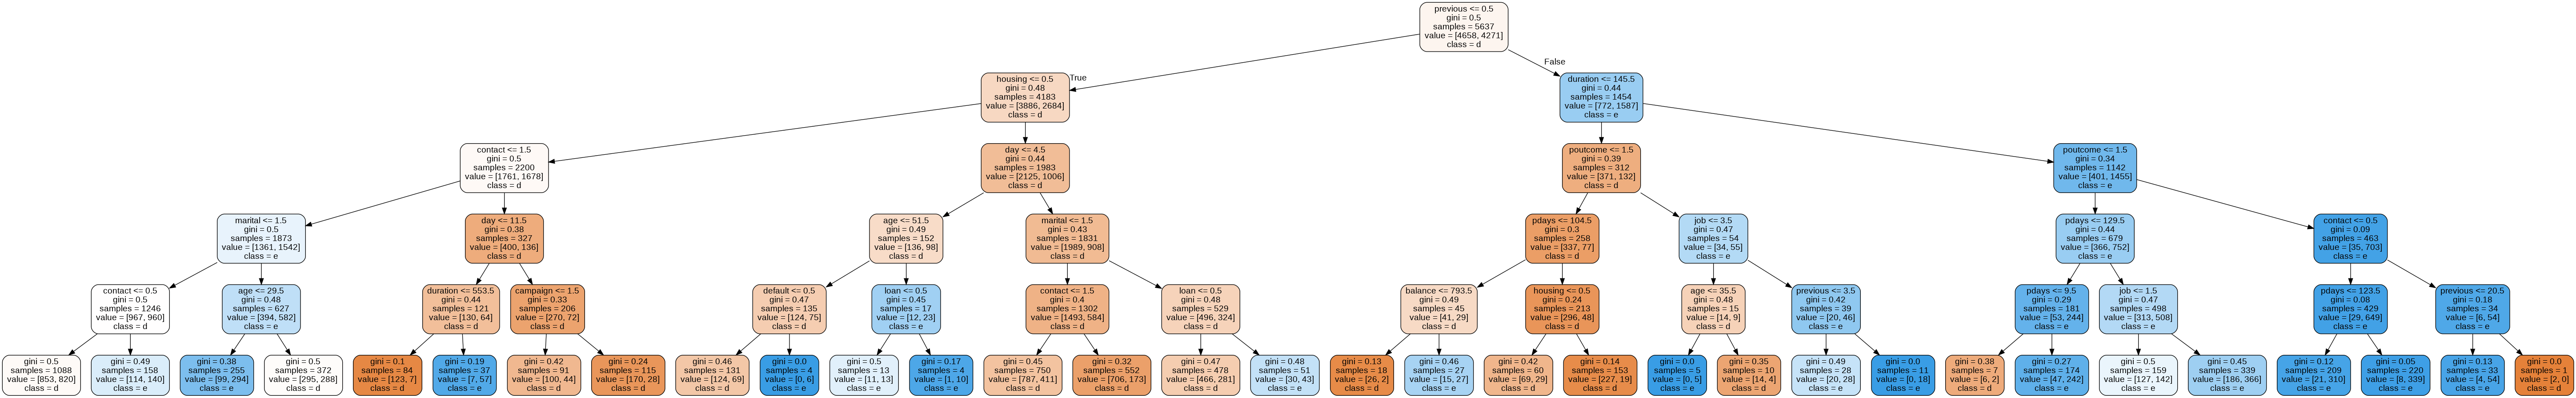

In [64]:
Image(filename = 'tree1.png')

**menampilkan nilai TP, TN, FP, FN untuk confussion matrix**

In [65]:
cm = metrics.confusion_matrix(y_test, y_pred1)
cm

array([[965, 216],
       [185, 867]])

**menampilkan nilai akurasi, precission, recall, F1 score dan cohens kappa score untuk model random forest :**

In [66]:
# Show the Accuracy, Precision, Recall
acc_rf = metrics.accuracy_score(y_test, y_pred1)
prec_rf = metrics.precision_score(y_test, y_pred1)
rec_rf = metrics.recall_score(y_test, y_pred1)
f1_rf = metrics.f1_score(y_test, y_pred1)
kappa_rf = metrics.cohen_kappa_score(y_test, y_pred1)

print("Accuracy:", acc_rf)
print("Precision:", prec_rf)
print("Recall:", rec_rf)
print("F1 Score:", f1_rf)
print("Cohens Kappa Score:", kappa_rf)

Accuracy: 0.8204209583519928
Precision: 0.8005540166204986
Recall: 0.8241444866920152
F1 Score: 0.8121779859484778
Cohens Kappa Score: 0.64021828792164


**membuat kurva ROC untuk random forest classifier**

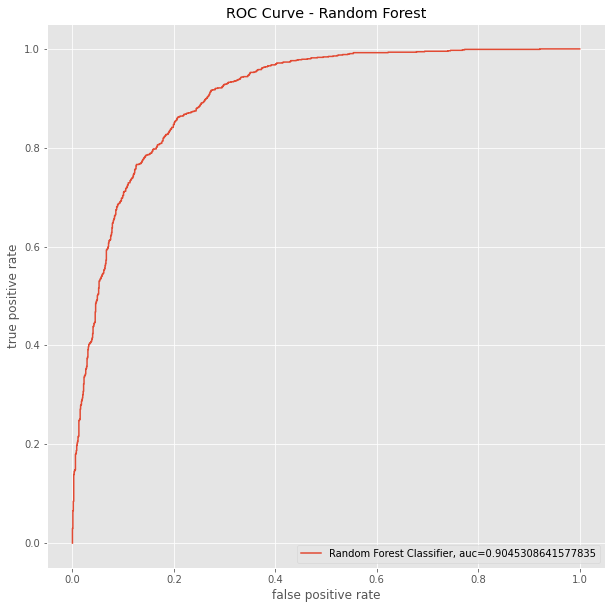

In [67]:
# Set Size and Style
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

# Visualize ROC Curve
y_pred1_proba = rfc.predict_proba(X_test)[::,1]
fprrfc, tprrfc, _ = metrics.roc_curve(y_test,  y_pred1_proba)
aucrfc = metrics.roc_auc_score(y_test, y_pred1_proba)
plt.plot(fprrfc,tprrfc,label="Random Forest Classifier, auc="+str(aucrfc))
plt.title('ROC Curve - Random Forest')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

## **Naive Bayes Classifier**

In [68]:
# Modeling Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict to Test Data
y_pred_gnb= gnb.predict(X_test)

**menampilkan nilai TP, TN, FP, FN untuk confussion matrix**

In [69]:
# Show the Confussion Matrix
cm_gnb = metrics.confusion_matrix(y_test, y_pred_gnb)
cm_gnb

array([[876, 305],
       [234, 818]])

**menampilkan nilai akurasi, precission, recall, F1 score dan cohens kappa score dari model naive bayes classfier:**

In [70]:
acc_gnb = metrics.accuracy_score(y_test, y_pred_gnb)
prec_gnb = metrics.precision_score(y_test, y_pred_gnb)
rec_gnb = metrics.recall_score(y_test, y_pred_gnb)
f1_gnb = metrics.f1_score(y_test, y_pred_gnb)
kappa_gnb = metrics.cohen_kappa_score(y_test, y_pred_gnb)

print("Accuracy:", acc_gnb)
print("Precision:", prec_gnb)
print("Recall:", rec_gnb)
print("F1 Score:", f1_gnb)
print("Cohens Kappa Score:", kappa_gnb)

Accuracy: 0.7586206896551724
Precision: 0.7284060552092609
Recall: 0.7775665399239544
F1 Score: 0.752183908045977
Cohens Kappa Score: 0.5174036871943393


**menampilkan kurva ROC naive bayes classifier**

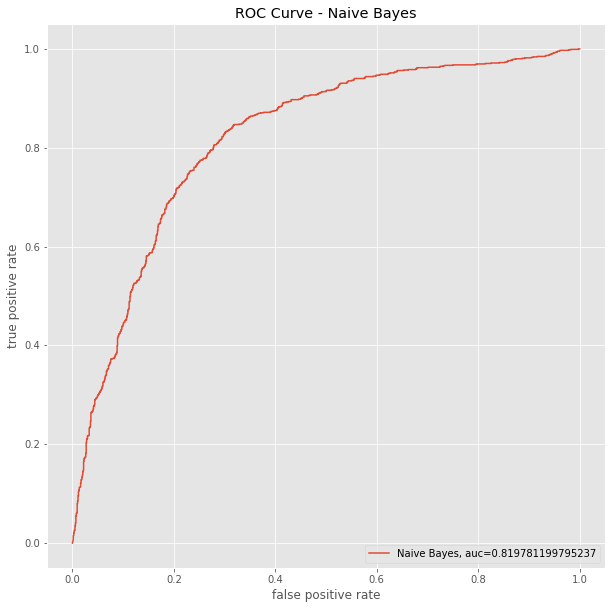

In [71]:
# ROC Curve
y_pred_gnb_proba = gnb.predict_proba(X_test)[::,1]
fprgnb, tprgnb, _ = metrics.roc_curve(y_test,  y_pred_gnb_proba)
aucgnb = metrics.roc_auc_score(y_test, y_pred_gnb_proba)
plt.plot(fprgnb,tprgnb,label="Naive Bayes, auc="+str(aucgnb))
plt.title('ROC Curve - Naive Bayes')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

## **Evaluation**

**menampilkan performa dari algoritma random forest classifier dan naive bayes classifier**

In [72]:
# Comparing Model Performance
print("Random Forest Accuracy =",acc_rf)
print("Random Forest Precision =",prec_rf)
print("Random Forest Recall =",rec_rf)
print("Random Forest F1-Score =", f1_rf)
print("_______________________")
print("Naive Bayes Accuracy =", acc_gnb)
print("Naive Bayes Precision =", prec_gnb)
print("Naive Bayes Recall =", rec_gnb)
print("Naive Bayes F1-Score =", f1_gnb)

Random Forest Accuracy = 0.8204209583519928
Random Forest Precision = 0.8005540166204986
Random Forest Recall = 0.8241444866920152
Random Forest F1-Score = 0.8121779859484778
_______________________
Naive Bayes Accuracy = 0.7586206896551724
Naive Bayes Precision = 0.7284060552092609
Naive Bayes Recall = 0.7775665399239544
Naive Bayes F1-Score = 0.752183908045977


**menampilkan kurva ROC dari algoritma random forest classifier dan naive bayes classifier**

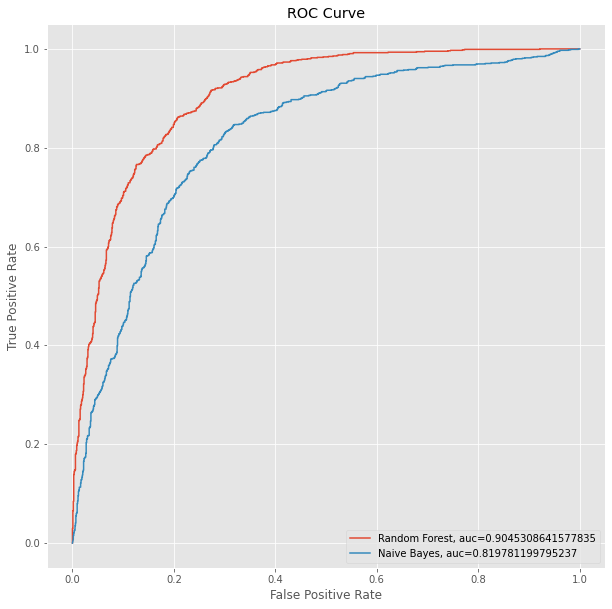

In [73]:
# Comparing ROC Curve
plt.plot(fprrfc,tprrfc,label="Random Forest, auc="+str(aucrfc))
plt.plot(fprgnb,tprgnb,label="Naive Bayes, auc="+str(aucgnb))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

**membuat dataframe yang berisi fitur dan hasil prediksi**

In [74]:
df_compare = X_test.copy()
df_compare['ActualClass'] = y_test
df_compare['RandomForest'] = y_pred1
df_compare['NaiveBayes'] = y_pred_gnb

In [75]:
df_compare.head()

,housing,loan,poutcome,job,contact,month,education,default,marital,age,balance,day,duration,campaign,pdays,previous,ActualClass,RandomForest,NaiveBayes
8096,0,1,3,3,0,10,1,0,0,56,1866,1,760,1,-1,0,0,1,1
8180,1,0,3,1,0,5,0,0,1,36,106,29,171,13,-1,0,0,0,0
1387,0,0,3,4,0,7,2,0,2,27,831,30,1081,2,-1,0,1,1,1
3047,0,0,0,0,0,2,1,0,1,38,11303,28,473,2,216,2,1,1,1
4670,0,0,0,5,0,8,1,0,1,58,1230,20,420,1,87,1,1,1,1


## **Conclusion**

dapat disimpulkan dari kedua algoritma ini pemodelan klasifikasi menggunakan random forest classifier lebih baik dibandingkan dengan naive bayes classifier, karena nilai akurasi, precission, recall, F1 score dan cohens kappa score dari random forest classifier lebih tinggi dibandingkan dengan naive bayes classifier.